# 6-1. イメージで理解する感染症モデル
## SIR モデル
感染症の予測を行なうための基本となるモデル（微分方程式）。
- Susceptible: 感受性保持者
- Infected: 感染者
- Recovered(or Removed): 免疫保持者（あるいは隔離者）

の頭文字から命名

In [1]:
# 微分方程式の Source-code の構造
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameter設定
dt = 1.0
beta = 0.000003
gamma = 0.1
S = 200000
I = 2
R = 0
alpha = I / (S + I + R)
num = 100

In [3]:
# 初期化（初期値設定）
inf = np.zeros(num)
sus = np.zeros(num)
rec = np.zeros(num)
inf[0] = I
sus[0] = S
rec[0] = R

In [4]:
# 時間発展方式
for t in range(1, num):
    # 時刻 t-1 から t への変化分の計算
    S = sus[t - 1]
    I = inf[t - 1]
    R = rec[t - 1]
    alpha = I / (S + I + R)
    delta_R = I * gamma
    delta_S = -beta * S * I
    if delta_S > 0:
        delta_S = 0
    delta_I = -delta_S - delta_R
    # 時刻 t での値で計算
    I = I + delta_I * dt
    R = R + delta_R * dt
    S = S + delta_S * dt
    if S < 0:
        s = 0
    sus[t] = S
    inf[t] = I
    rec[t] = R

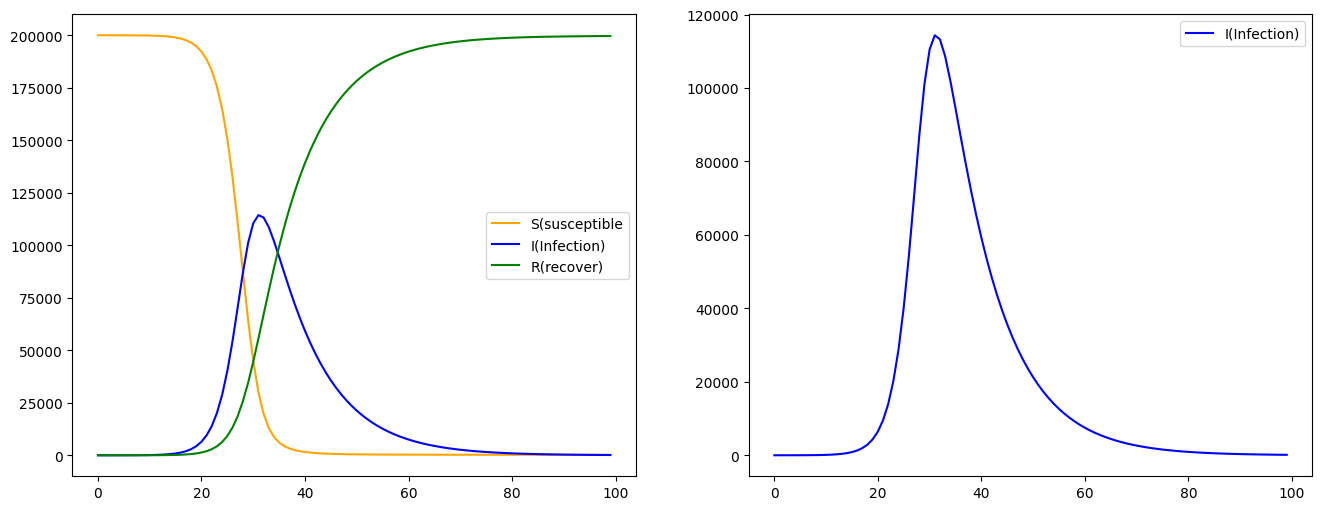

In [5]:
# Graph描画
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(sus, label='S(susceptible', color='orange')
plt.plot(inf, label='I(Infection)', color='blue')
plt.plot(rec, label='R(recover)', color='green')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(inf, label='I(Infection)', color='blue')
plt.legend()

初期値が時間発展方程式に従って for loop で更新していけば、時刻 t の状況が予測できることになる。

SIR-model を元に微分方程式、そして数値シミュレーションを使いこなすまでに至るには、やや複雑。

微分方程式の最も単純なものである **「ねずみ算」** から理解を深めていく。

# 感染症 Model を理解するための「ねずみ算」
## ねずみ算
２匹が４匹に、４匹が８匹に次々に個体数が増えていく微分方程式 Model.

In [6]:
# ねずみ算を実行する Source-code
import numpy as np
import matplotlib.pyplot as plt

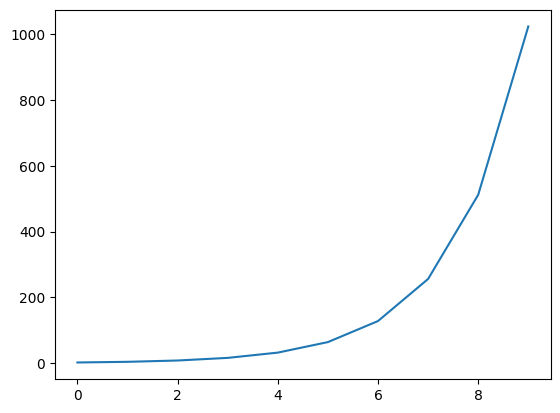

In [7]:
# Parameter設定
dt = 1.0
a = 1.0
num = 10

# 初期化（初期化設定）
n = np.zeros(num)
n[0] = 2.0

# 時間発展方程式
for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]

# Graph描画
plt.plot(n)
plt.show()

### Data-Visualizatn
数値シミュレーションの結果を Animation を利用して効果的に見せる。

In [8]:
# ねずみ算の Animation を実行する
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0
a = 1.0
num = 10
x_size = 8.0
y_size = 6.0

# 初期化（初期値設定）
n = np.zeros(num)
n[0] = 2
list_plot = []

# 時間発展方式
fig = plt.figure()

for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]
    x_n = np.random.rand(int(n[t])) * x_size
    y_n = np.random.rand(int(n[t])) * y_size
    img = plt.scatter(x_n, y_n, color='black')
    list_plot.append([img])

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

ねずみ算は単純ではあるが、計算結果を Graph にして、Animation にしていくという一連の流れ、つまり数値Simulation の基礎的な流れはすべて含まれている。

## 6-3. ねずみ算の Parameter を変化させ、直感的な理解をしてみよう

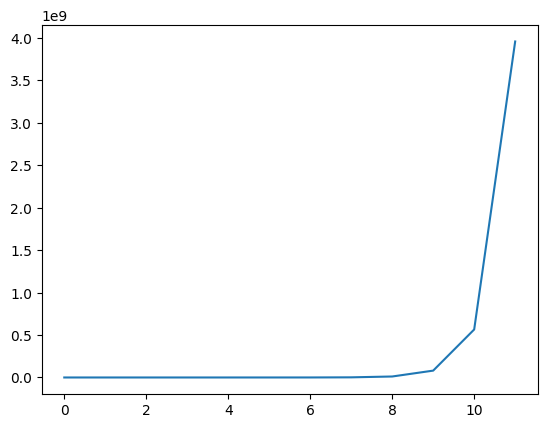

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
a =  6.0 # １匹平均６匹の子を宿す
num = 12 # t の単位を１ケ月とし1年間、つまり12ヶ月分

# 初期化
n = np.zeros(num)
n[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]

plt.plot(n)
plt.show()

ねずみ算だけでは、「頭打ち」という現象について説明することができない。
SIR-Model のR(免疫保持者)の Graph も無限に増えていくわけではなく頭打ちを迎え、予測としても不正確になってしまうため発展した方程式が必要になる。

## 6-4. 実際の生物や社会の現象を説明する Logistic方程式
### Logistic方程式
ねずみ算に「頭打ち：を考慮した微分方程式

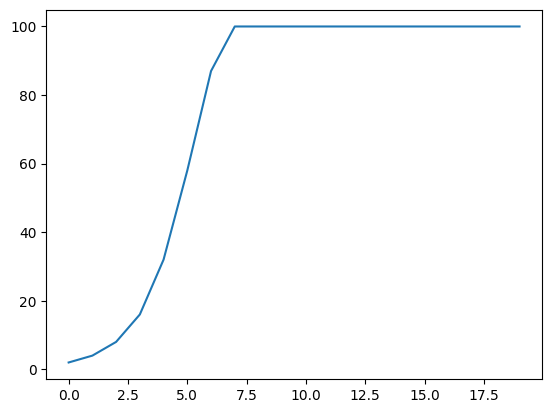

In [10]:
# Logistic方程式を実行する
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
a = 1.2
capacity = 100
num = 20

# 初期化（初期値設定）
n = np.zeros(num)
n[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta = int(a * n[t - 1] * (1 - n[t - 1] / capacity))
    n[t] = delta * dt + n[t - 1]

plt.plot(n)
plt.show()


Logistic方程式は環境の許容量を超えると「頭打ち」にする。

In [11]:
# Logistic方程式の Animation を実行する
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0
a = 1.2
num = 20
capacity = 100
x_size = 8.0
y_size = 6.0

# 初期化（初期値設定）
n = np.zeros(num)
n[0] = 2
list_plot = []

# 時間発展方程式
fig = plt.figure()
for t in range(1, num):
    delta = int(a * n[t - 1] * (1 - n[t - 1] / capacity))
    n[t] = delta * dt + n[t - 1]
    x_n = np.random.rand(int(n[t])) * x_size
    y_n = np.random.rand(int(n[t])) * y_size
    img = plt.scatter(x_n, y_n, color='black')
    list_plot.append([img])

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1_000)
rc('animation', html='jshtml')
plt.close()
anim

一度頭打ちにすると個体数は変化せず、個体の位置だけが Random（※ Random に表示するように Programing している） に変化する。

## Logistic方程式の Parameter を変化させ、直感的な理解をしてみよう
Cruise船 Diamond-Princess号における新型Corona-Virus感染者数の増加の様子を Logistic方程式で表現する。
- 乗客 3,000名のうち感染した患者数は約700名。 = capacity: 700, a: 1.1

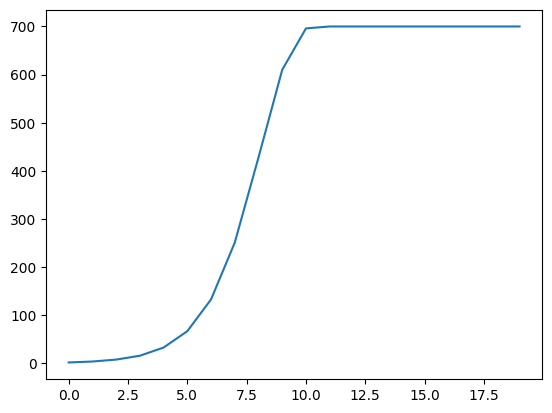

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
a = 1.1
capacity = 700
num = 20

# 初期化（初期値設定）
n = np.zeros(num)
n[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta = int(a * n[t - 1] * (1 - n[t - 1] / capacity))
    n[t] = delta * dt + n[t - 1]

plt.plot(n)
plt.show()

約11日間で感染者数が頭打ちするという Graph になる。
※実際には「ねずみ算」と「頭打ち」だけで表現できるほど単純ではないが大まかな性質によって現象を説明するには有効になる。

## 6-6. 生物間や競合他社との競争を説明するロトカボルテラ方程式（競争系）
「競争」という要素を微分方程式に取り入れることで、同じ商品を扱う競合他社との企業間の競争にも応用できる。

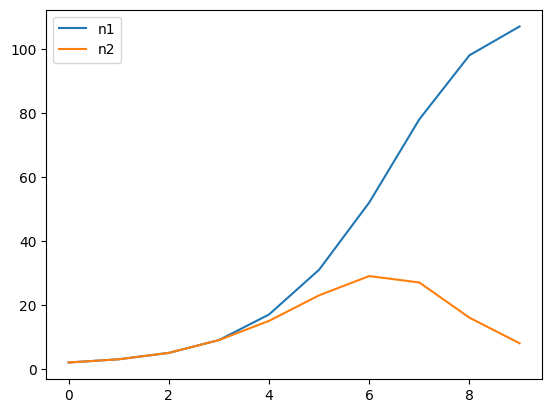

In [13]:
# Lotka-Volterra方程式(競争系)を実行する# #
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
r1 = 1
k1 = 110
a = 0.1
r2 = 1
k2 = 80
b = 1.1
num = 10

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
n1[0] = 2
n2[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta_n1 = int(r1 * n1[t - 1] * (1 - (n1[t - 1] + a * n2[t - 1]) / k1))
    n1[t] = delta_n1 * dt + n1[t - 1]
    delta_n2 = int(r2 * n2[t - 1] * (1 - (n2[t - 1] + b * n1[t - 1]) / k2))
    n2[t] = delta_n2 * dt + n2[t - 1]

plt.plot(n1, label='n1')
plt.plot(n2, label='n2')
plt.legend()
plt.show()

n1 と n2 がお互いに競合しあい、結果として n2 が競争に負けて急激に現象していく様子が Graph から確認できる。

In [14]:
# Lotka-Volterra方程式（競争系）の Animation を実行する
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0
r1 = 1
k1 = 110
a = 0.1
r2 = 1
k2 = 80
b = 1.1
num = 10
x_size = 8.0
y_size = 6.0

# 初期化（初期設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
n1[0] = 2
n2[0] = 2
list_plot = []

# 時間発展方程式
fig = plt.figure()
for t in range(1, num):
    delta_n1 = int(r1 * n1[t - 1] * (1 - (n1[t - 1] + a * n2[t - 1]) / k1))
    n1[t] = delta_n1 * dt + n1[t - 1]
    delta_n2 = int(r2 * n2[t - 1] * (1 - (n2[t - 1] + b * n1[t - 1]) / k2))
    n2[t] = delta_n2 * dt + n2[t - 1]
    x_n1 = np.random.rand(int(n1[t])) * x_size
    y_n1 = np.random.rand(int(n1[t])) * y_size
    img = [plt.scatter(x_n1, y_n1, color='blue')]
    x_n2 = np.random.rand(int(n2[t])) * x_size
    y_n2 = np.random.rand(int(n2[t])) * y_size
    img += [plt.scatter(x_n2, y_n2, color='red')]
    list_plot.append(img)

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

n2(赤色)が競争に敗れ、結果として個体種が減少していく一方、n1(青色)が個体数を増やしていく様子が Animation によって確認できる。

ロトカボルテ(Lotka-Volterra)方程式は、２種の競争関係を表す微分方程式であることから自由度が高く（=操作できる Parameter の数が多い）より現実に近い表現が可能になる。

## 6-7. Lotka-Volterra方程式(競争系)の Parameter を変化させ、直感的な理解をしてみよう
a の値を少しずつ増やし、どこまで増やせば n2 が n1 に比べて競争優位性を持つか調査してみる。

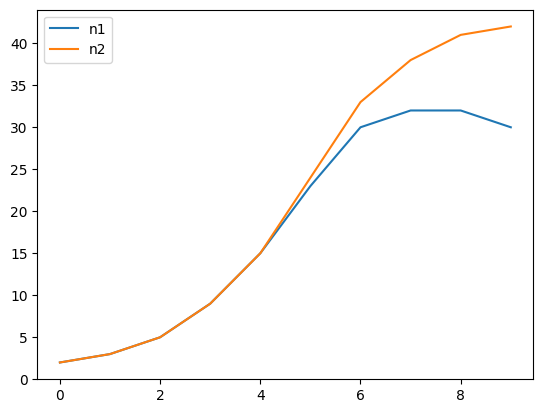

In [15]:
# Lotka-Volterra方程式(競争系)を実行する# ####
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
r1 = 1
k1 = 110
a = 2.1
r2 = 1
k2 = 80
b = 1.1
num = 10

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
n1[0] = 2
n2[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta_n1 = int(r1 * n1[t - 1] * (1 - (n1[t - 1] + a * n2[t - 1]) / k1))
    n1[t] = delta_n1 * dt + n1[t - 1]
    delta_n2 = int(r2 * n2[t - 1] * (1 - (n2[t - 1] + b * n1[t - 1]) / k2))
    n2[t] = delta_n2 * dt + n2[t - 1]

plt.plot(n1, label='n1')
plt.plot(n2, label='n2')
plt.legend()
plt.show()

a が 1.9 を超えると n2 が n1 に比べて優位になる。
より大きな許容度を持つ k1 を占有するには、より大きな値の圧迫度合いが必要な為、結果として a の値を大きくしないと n2 が競争優位に立てない。

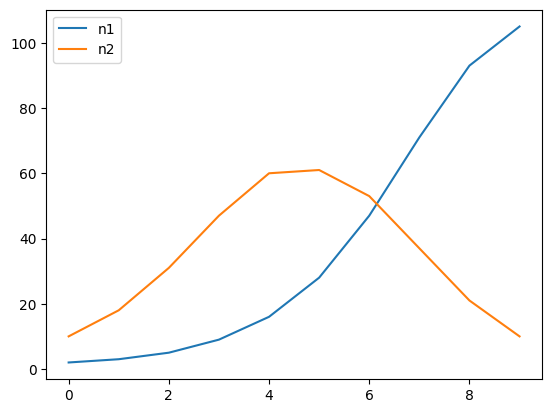

In [16]:
# Lotka-Volterra方程式(競争系)を実行する# #####
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
r1 = 1
k1 = 110
a = 0.1
r2 = 1
k2 = 80
b = 1.1
num = 10

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
n1[0] = 2
n2[0] = 10

# 時間発展方程式
for t in range(1, num):
    delta_n1 = int(r1 * n1[t - 1] * (1 - (n1[t - 1] + a * n2[t - 1]) / k1))
    n1[t] = delta_n1 * dt + n1[t - 1]
    delta_n2 = int(r2 * n2[t - 1] * (1 - (n2[t - 1] + b * n1[t - 1]) / k2))
    n2[t] = delta_n2 * dt + n2[t - 1]

plt.plot(n1, label='n1')
plt.plot(n2, label='n2')
plt.legend()
plt.show()

初期値を `n2[0]=10` と設定。
初期値が大きい（=良い Start-Dash を切れた）企業の商品は、最初は大きな Share を奪うことに成功するが、徐々に競争優位性を持つ企業の商品に Share を奪われていき、最後は商品がほとんど売れなくなる状況に類似する。
逆に「前半のうちはあまり売れ行きがよくないことから、自らの競争優位性に気づくことができなければ早期撤退をしてしまい、結果として後半の Share を奪うという未来が実現できないこともあらわす。

## 6-8. 他生物種や他者との共生関係を説明する Rotka-Volterra方程式（捕食系）
「捕食」と「被食」の関係について説明する微分方程式。
上記の関係は、企業間の関係など社会においても広く見られる関係。

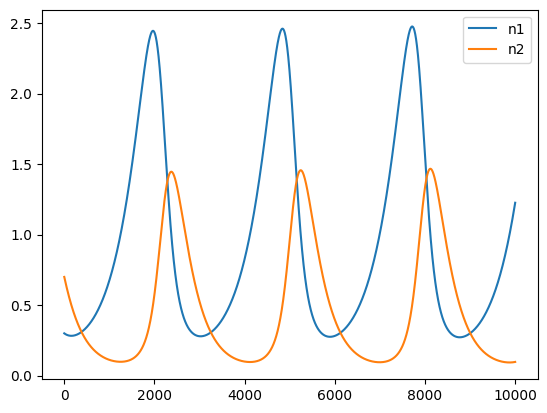

In [17]:
# Rotka-Volterra方程式（捕食系）を実行する
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 0.01
alpha = 0.2
beta = 0.4
gamma = 0.3
delta = 0.3
num = 10_000

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
t = np.zeros(num)
n1[0] = 0.3
n2[0] = 0.7

# 時間発展方程式
for i in range(1, num):
    t[i] = i * dt
    delta_n1 = n1[i - 1] * (alpha - beta * n2[i - 1])  # -beta*n2[n-1]があることによって、n2が増えれば増えるほど、n1 はその数を減らす。
    delta_n2 = -n2[i - 1] * (gamma - delta * n1[i - 1])
        # -delta*n1[n-1]があることによって、n1 が増えると、自分自身の個体数 n2 が減って 0 になることなく、捕食することでその個体数を増やす、という性質を持つ。
    n1[i] = delta_n1 * dt + n1[i - 1]
    n2[i] = delta_n2 * dt + n2[i - 1]

plt.plot(n1, label="n1")
plt.plot(n2, label="n2")
plt.legend()
plt.show()

Rhythmical な繰り返し波形を描く。
結果として安定した関係が築けることから、捕食と被食の関係は「共存関係」の１つとされる。
捕食と被食の関係は少ない時間間隔で見ると不安定だが、長期的には Rhythmical に同様の活動を繰り返すことから、動的な安定状態であるとし **「動的平衡」**などと呼ばれる。
企業活動でいうと、企業の採用活動などに見られる。

## Rotka-Volterra方程式（捕食系）の Parameter を変化させ、直感的な理解をしてみよう


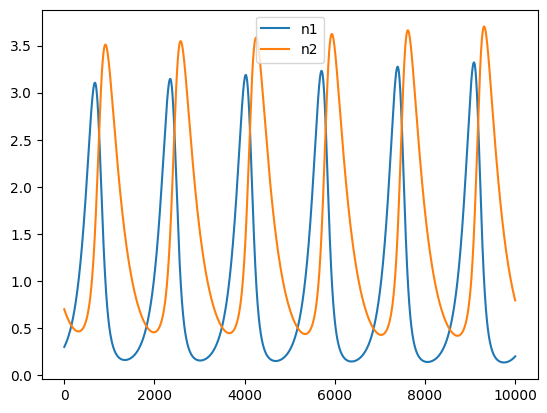

In [18]:
# alpha = 0.6 としたときの Rotka-Volterra方程式（捕食系）によって描画される Graph
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 0.01
alpha = 0.6  # 一度にどれだけ子孫を残せるかを表現するもの
beta = 0.4
gamma = 0.3
delta = 0.3
num = 10_000

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
t = np.zeros(num)
n1[0] = 0.3
n2[0] = 0.7

# 時間発展方程式
for i in range(1, num):
    t[i] = i * dt
    delta_n1 = n1[i - 1] * (alpha - beta * n2[i - 1])  # -beta*n2[n-1]があることによって、n2が増えれば増えるほど、n1 はその数を減らす。
    delta_n2 = -n2[i - 1] * (gamma - delta * n1[i - 1])
        # -delta*n1[n-1]があることによって、n1 が増えると、自分自身の個体数 n2 が減って 0 になることなく、捕食することでその個体数を増やす、という性質を持つ。
    n1[i] = delta_n1 * dt + n1[i - 1]
    n2[i] = delta_n2 * dt + n2[i - 1]

plt.plot(n1, label="n1")
plt.plot(n2, label="n2")
plt.legend()
plt.show()

alpha を大きくすればするほど、n1がn2に比べて優位に立てるはずだが、「食物連鎖」においては、その限りではない、ということがわかる。
n1 の最大値は増加しているが、それ以上に n2 の最大値が n1 を上回るようになる。そして、Cycle が早くなっていることが確認とれる。
n1 の急激な増加によって、その Cycle を早めてしまうのかもしれない

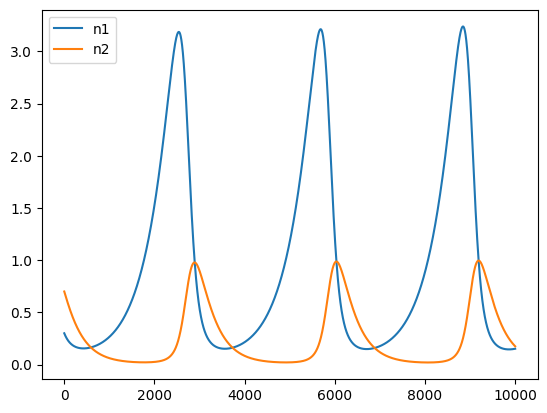

In [19]:
# beta = 0.8 としたときの Rotka-Volterra方程式（捕食系）によって描画される Graph#
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 0.01
alpha = 0.2  # 一度にどれだけ子孫を残せるかを表現するもの
beta = 0.8
gamma = 0.3
delta = 0.3
num = 10_000

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
t = np.zeros(num)
n1[0] = 0.3
n2[0] = 0.7

# 時間発展方程式
for i in range(1, num):
    t[i] = i * dt
    delta_n1 = n1[i - 1] * (alpha - beta * n2[i - 1])  # -beta*n2[n-1]があることによって、n2が増えれば増えるほど、n1 はその数を減らす。
    delta_n2 = -n2[i - 1] * (gamma - delta * n1[i - 1])
    # -delta*n1[n-1]があることによって、n1 が増えると、自分自身の個体数 n2 が減って 0 になることなく、捕食することでその個体数を増やす、という性質を持つ。
    n1[i] = delta_n1 * dt + n1[i - 1]
    n2[i] = delta_n2 * dt + n2[i - 1]

plt.plot(n1, label="n1")
plt.plot(n2, label="n2")
plt.legend()
plt.show()

n2 は大きく減少し、それに比較して n1 は増加している。
n1 が、n2 の影響で増加を抑えられるため、結果として n2自体が抑制されてしまった（まわりまわって自分が抑制された）ことを意味する。

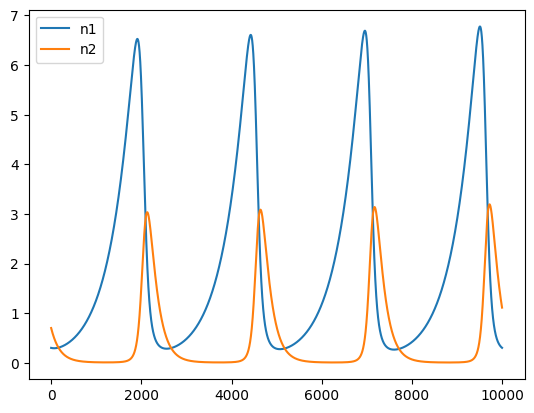

In [20]:
# gamma = 0.6 としたときの Rotka-Volterra方程式（捕食系）によって描画される Graph#
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 0.01
alpha = 0.2  # 一度にどれだけ子孫を残せるかを表現するもの
beta = 0.4
gamma = 0.6
delta = 0.3
num = 10_000

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
t = np.zeros(num)
n1[0] = 0.3
n2[0] = 0.7

# 時間発展方程式
for i in range(1, num):
    t[i] = i * dt
    delta_n1 = n1[i - 1] * (alpha - beta * n2[i - 1])  # -beta*n2[n-1]があることによって、n2が増えれば増えるほど、n1 はその数を減らす。
    delta_n2 = -n2[i - 1] * (gamma - delta * n1[i - 1])
    # -delta*n1[n-1]があることによって、n1 が増えると、自分自身の個体数 n2 が減って 0 になることなく、捕食することでその個体数を増やす、という性質を持つ。
    n1[i] = delta_n1 * dt + n1[i - 1]
    n2[i] = delta_n2 * dt + n2[i - 1]

plt.plot(n1, label="n1")
plt.plot(n2, label="n2")
plt.legend()
plt.show()

n2 が増えれば増えるほど n2 の増加は大きく減少しそうだが、n2 の個体数が急激に減少することで n1 の個体数が増加し、結果として n2 の最大値も大きくなるという Mechanism が働く。
結果として gamma を大きくすると n1, n2 双方の増加につながる。

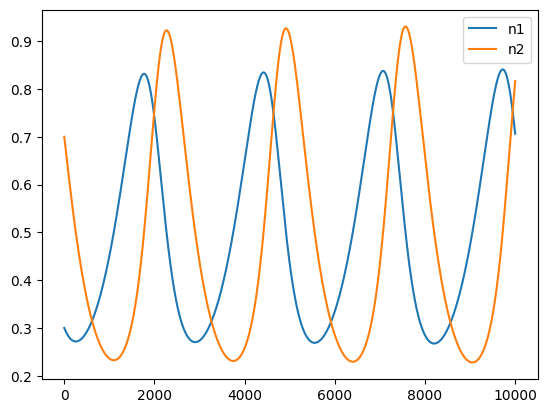

In [21]:
# delta = 0.6 としたときの Rotka-Volterra方程式（捕食系）によって描画される Graph
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 0.01
alpha = 0.2
beta = 0.4
gamma = 0.3
delta = 0.6  # n1、１つあたりの捕食によって増える n2 の量が大きくなることを意味する。
num = 10_000

# 初期化（初期値設定）
n1 = np.zeros(num)
n2 = np.zeros(num)
t = np.zeros(num)
n1[0] = 0.3
n2[0] = 0.7

# 時間発展方程式
for i in range(1, num):
    t[i] = i * dt
    delta_n1 = n1[i - 1] * (alpha - beta * n2[i - 1])  # -beta*n2[n-1]があることによって、n2が増えれば増えるほど、n1 はその数を減らす。
    delta_n2 = -n2[i - 1] * (gamma - delta * n1[i - 1])
        # -delta*n1[n-1]があることによって、n1 が増えると、自分自身の個体数 n2 が減って 0 になることなく、捕食することでその個体数を増やす、という性質を持つ。
    n1[i] = delta_n1 * dt + n1[i - 1]
    n2[i] = delta_n2 * dt + n2[i - 1]

plt.plot(n1, label="n1")
plt.plot(n2, label="n2")
plt.legend()
plt.show()

少量の n1 で n2 の個体数を増加できるようになれば、その分 n2 は増える。それだけではなく、n1 の増加により早く追従できるようになる。

４つの Parameter(alpha, beta, gamma, delta)の性質を理解できれば、企業の採用活動の Data と照合して Parameter を tuning し、Data を説明することにも活用できる。

## 6-10. 微分方程式を復習しながら映画や商品の Hit を予測する方法を考えよう
### 社会物理学
商品の Hit などを微分方程式などといった物理学において扱う手法を用いて説明し、予測する学問。
経済現象を含め、さまざまな社会現象を取り扱うことのできる学問

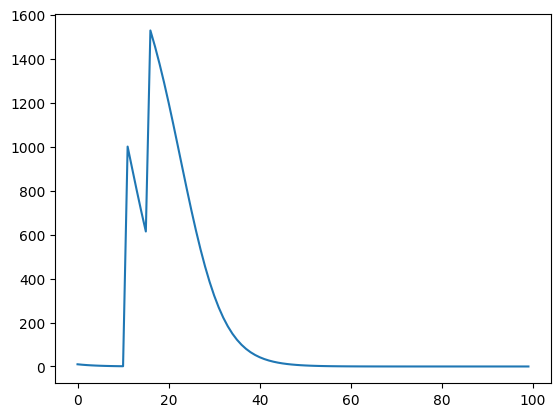

In [3]:
# Hit を予測する# #
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
D = 1.0  # 口コミによる直接Communication の強さ
a = 1.2  # やがて飽きられて減衰していく強さ
P = 0.0001  # SNSなどによる間接Communication の強さ
C = 10  # 広告媒体による強さ
num = 100

# 初期化（初期値設定）
I = np.zeros(num)
A = np.zeros(num)
I[0] = 10.0  # 10人だけが知っている状態を仮定
A[10] = 100.0  # 10日目に広告を配信することを仮定
A[15] = 100.0  # 15日目に広告を配信することを仮定

# 時間発展方程式
for t in range(1, num):
    delta_I = (D-a)*I[t-1] + P*I[t-1]**2 + C*A[t-1]
    I[t] = delta_I*dt + I[t-1]

# Graph描画
plt.plot(I)
plt.show()

広告を打った後は、すぐにそれを知る人が増えるものの、やがては減衰していく様子、しかしながら連続的に広告を打つことで、その効果が増加していくことが確認できる。
Twitter による投稿数と比較することで Parameter の値が逆算でき Hit を推定できる。